In [1]:
from sklearn.linear_model import LogisticRegression

In [3]:
model = LogisticRegression()
x = [[8,6], [3,5], [4,9], [5,8],[9,9]]
y = ['yes', 'no', 'no', 'yes', 'yes']

model.fit(x,y)

x_pred = [[4,4], [5,5]]
y_pred = model.predict(x_pred)
print('if x = [4, 4] then y =', y_pred[0])
print('if x = [5, 5] then y =', y_pred[1])
print()
print('Probability [1-P P] : ')
prob = model.predict_proba(x_pred)
print(prob)

if x = [4, 4] then y = no
if x = [5, 5] then y = yes

Probability [1-P P] : 
[[0.69084069 0.30915931]
 [0.46545907 0.53454093]]


In [4]:
import pandas as pd

data = pd.DataFrame(pd.read_csv('../day5/data/logis_hours_study.csv'))
data.head()

,hours_study,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [6]:
import numpy as np
x = np.array(data['hours_study']).reshape(-1,1)
y = data['pass']

model = LogisticRegression()
model.fit(x,y)


LogisticRegression()

In [8]:
x_pred = [2.2, 3.3, 4.4]
x_pred = np.array(x_pred).reshape(-1,1)
y_pred = model.predict(x_pred)
print("Prediction:")

for (i, xp) in enumerate(x_pred):
    r = 'Fail' if y_pred[i] == 0 else 'Pass'
    print(f'Study: {xp[0]} hours(s) => {r}')
print()
print('Logistic Function')
ic = '{:.2f}'.format(model.intercept_[0])
ce = '{:.2f}'.format(model.coef_[0,0])
print(f'P(x) = 1 / ( 1 + exp({ic} + {ce}*x))')

Prediction:
Study: 2.2 hours(s) => Fail
Study: 3.3 hours(s) => Pass
Study: 4.4 hours(s) => Pass

Logistic Function
P(x) = 1 / ( 1 + exp(-3.14 + 1.15*x))


In [9]:
machine_data = pd.read_excel('../day5/data/machine-spec.xlsx')
machine_data

,machine_age_months,operate_hours_per_day,machine_meets_spec
0,57,4,1
1,73,5,0
2,22,5,1
3,59,4,0
4,15,4,1
5,36,2,1
6,68,5,0
7,49,5,0
8,27,7,0
9,59,3,1


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize
x = machine_data[['machine_age_months','operate_hours_per_day']]
y = machine_data['machine_meets_spec']
sclr = StandardScaler()
x = sclr.fit_transform(x)
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [12]:
x_pred = [[30,6], [40, 8], [50, 5], [60,3]]
x_pred_sc = sclr.transform(x_pred)
y_pred = model.predict(x_pred_sc)
print('Prediction:')
for (i,xp) in enumerate(x_pred):
    mp = 'NOK' if y_pred[i] == 0 else 'OK'
    t = f'Machine Age: {xp[0]} Months'
    t += f'Opearte: {xp[1]} Hours/Day'
    t += f'=>Meet Spec: {mp}'
    print(t)
print('Logistic Function')
ic = '{:.2f}'.format(model.intercept_[0])
ce1 = '{:.2f}'.format(model.coef_[0,0])
ce2= '{:.2f}'.format(model.coef_[0,1])
print(f'P(x) = 1 / (1 + exp({ic} + ({ce1})age + ({ce2})hour))')

Prediction:
Machine Age: 30 MonthsOpearte: 6 Hours/Day=>Meet Spec: OK
Machine Age: 40 MonthsOpearte: 8 Hours/Day=>Meet Spec: NOK
Machine Age: 50 MonthsOpearte: 5 Hours/Day=>Meet Spec: NOK
Machine Age: 60 MonthsOpearte: 3 Hours/Day=>Meet Spec: OK
Logistic Function
P(x) = 1 / (1 + exp(-0.14 + (-1.16)age + (-0.98)hour))


c:\Users\User\Documents\sut_ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
customer_data = pd.DataFrame(pd.read_excel('../day5/data/logis_customer.xlsx'))
customer_data.head()

,gender,age,salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
encoder = LabelEncoder()
customer_data['gender'] = encoder.fit_transform(customer_data['gender'])
features = ['gender', 'age', 'salary']
x = customer_data[features]
y = customer_data['purchased']
x.head()

,gender,age,salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [30]:
sclr = StandardScaler()
x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred_test = model.predict(x_test)
print("confusion Matrix:")
c_matrix = confusion_matrix(y_test, y_pred_test)
print(c_matrix)

confusion Matrix:
[[65  3]
 [ 7 25]]


In [32]:
print('Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision:', '{:.2f}'.format(precision_score(y_test, y_pred_test)))
print('Recall:', '{:.2f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred_test)))

Accuracy: 0.90
Precision: 0.89
Recall: 0.78
F1 Score: 0.83


In [33]:
err = (c_matrix[0, 1] + c_matrix[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print()
print(classification_report(y_test, y_pred_test))

Error Rate 0.10

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [34]:
from sklearn.preprocessing import binarize
y_pred_th_0_5 = model.predict(x_test) 
print('Confusion Matrix Threshold = 0.5')
print(confusion_matrix(y_test, y_pred_th_0_5))
print() 
proba = model.predict_proba(x_test)
y_bin_th_0_25 = binarize(proba, threshold=0.25)
y_pred_th_0_25 = y_bin_th_0_25[:, 1]
print('Confusion Matrix Threshold = 0.25')
print(confusion_matrix(y_test, y_pred_th_0_25))

Confusion Matrix Threshold = 0.5
[[65  3]
 [ 7 25]]

Confusion Matrix Threshold = 0.25
[[53 15]
 [ 1 31]]


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
probs = model.predict_proba(x_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)

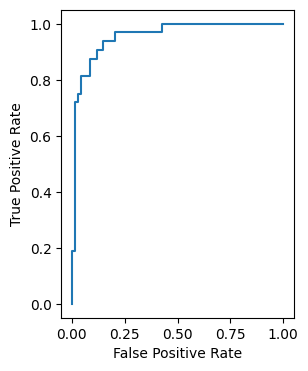

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
auc_score = auc(fpr, tpr)
print('AUC Score:', '{:.2f}'.format(auc_score))

AUC Score: 0.95


In [40]:
probs = model.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test, probs)
print('AUC Score:', f'{auc_score:.2f}')

AUC Score: 0.95
